# Analyse pandas files

Purpose detection of bad files

work with Weakly_2023_11
- use jupyter kernel LSST
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/04/04
- last update : 2023/04/07


In [1]:
import h5py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

In [3]:
import seaborn as sns
sns.set_style("ticks",{'axes.grid' : True})
#sns.set(rc={'figure.figsize':(16,16)})

In [4]:
import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd
pd.options.display.max_columns = None

plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [5]:
from astropy.time import Time
import astropy.units as u

In [1]:
DateToRuncollection = {
    
    
 # september 2022
 20220912 :  "u/dagoret/BPS_manyspectro_v60", # Missing collection
 20220913 :  "u/dagoret/BPS_manyspectro_v61", # Missing collection
 20220914 :  "u/dagoret/BPS_manyspectro_v62", # Missing collection  
    
 20220927 :  "u/dagoret/BPS_manyspectro_v63", # Mount errors available, mitigé
 20220928 :  "u/dagoret/BPS_manyspectro_v64", # Mount errors available, very nice spectra
 20220929 :  "u/dagoret/BPS_manyspectro_v65", # Mount errors available, very nice spectra
    
    
 # october 2022
 20221012 :  "u/dagoret/BPS_manyspectro_v56", # mount errors , nice, all good
 20221025 :  "u/dagoret/BPS_manyspectro_v57", # mount errors, very very bad spectra, run not selected
 20221026 :  "u/dagoret/BPS_manyspectro_v58", # mount errors,  very nice spectra, all good
 20221027 :  "u/dagoret/BPS_manyspectro_v59", # mount errors,  nice spectra, all good
    
 # november 2022
 20221109 :  "u/dagoret/BPS_manyspectro_v53", # mount errors, nice spectra, few bad labelled as good 
 20221110 :  "u/dagoret/BPS_manyspectro_v54", # mount errors available, many bad rec spectra, few bad labelled as good, versy strange
 20221123 :  "u/dagoret/BPS_manyspectro_v55", # mount errors , nice   
    
 # december 2022   
 20221207 :  "u/dagoret/BPS_manyspectro_v48", # No mount error, nice spectra
 20221208 :  "u/dagoret/BPS_manyspectro_v49", # No mount error, nice spectra, one bad labelled as good
 20221209 :  "u/dagoret/BPS_manyspectro_v50", # No mount error, spectra at distance from optical center, very interesting
 20221210 :  "u/dagoret/BPS_manyspectro_v51", # No mount error, bof
 20221212 :  "u/dagoret/BPS_manyspectro_v52", # No mount error, very bad gains and instability 
    
 #January 2023 
 20230117 :  "u/dagoret/BPS_manyspectro_v79", # no mount errors, some mucol spectra that looks good are rejected on DCCD
 20230118 :  "u/dagoret/BPS_manyspectro_v80", # no mount error, some mucol looking good are rejected, many bad centroid calculation
 20230119 :  "u/dagoret/BPS_manyspectro_v77", # no mount errors, many blurred spectra probably due to strong tracking error
 20230131 :  "u/dagoret/BPS_manyspectro_v78", # missing for moment

 #february 2023
 20230214 :  "u/dagoret/BPS_manyspectro_v42", # no mount errors, nothing special
 20230215 :  "u/dagoret/BPS_manyspectro_v43", # mount errors, OK
 20230216 :  "u/dagoret/BPS_manyspectro_v44", # mount errors, OK, nice spectra 
 20230228 :  "u/dagoret/BPS_manyspectro_v70", # No mount error,OK nice spectra
    
 #march 2023  
 20230301 :  "u/dagoret/BPS_manyspectro_v71", # no mount errors, OK many spectra
 20230302 :  "u/dagoret/BPS_manyspectro_v72", # no mount error, sometime bad subtraction of order2 on HD38666 (mucol) 
 20230315 :  "u/dagoret/BPS_manyspectro_v73", # mount errors
 20230316 :  "u/dagoret/BPS_manyspectro_v74", # mount errors   
    
    
}

In [7]:
DATE = 20221027
filterdispersername = "empty~holo4_003"

In [8]:
configmode = "PSF2DFFM_REBIN2"
specver="specV2.4"

In [9]:
input_summary_file = f"fullsummaryspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.csv"
input_file_h5 = f"allspectra_{DATE}-{filterdispersername}-{configmode}-{specver}-oga.hdf5"

In [10]:
input_summary_file

'fullsummaryspectra_20221027-empty~holo4_003-PSF2DFFM_REBIN2-specV2.4-oga.csv'

# Read pandas file

In [11]:
df=pd.read_csv(input_summary_file,index_col=0)

In [12]:
df

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,spec_parallactic_angle,spec_camera_angle,spec_order,spec_header_target,spec_header_redshift,spec_header_grating,spec_header_rotangle,spec_header_d2ccd,spec_header_lshift,spec_header_parangle,spec_header_targetx,spec_header_targety,spec_header_lbda_ref,spec_header_pixshift,spec_header_psf_reg,spec_header_trace_r,spec_header_chi2_fit,spec_header_a2_fit,spec_header_am_fit,spec_header_meanfwhm,spec_header_version,spec_header_rebin,spec_header_date-obs,spec_header_exptime,spec_header_airmass,spec_header_dec,spec_header_ha,spec_header_outtemp,spec_header_outpress,spec_header_outhum,spec_header_filter,spec_header_cam_rot,spec_header_s_x0,spec_header_s_y0,spec_header_s_xmin,spec_header_s_xmax,spec_header_s_ymin,spec_header_s_ymax,spec_header_s_nx,spec_header_s_ny,spec_header_s_dec,spec_header_s_sat,spec_spectrogram_x0,spec_spectrogram_y0,spec_spectrogram_xmin,spec_spectrogram_xmax,spec_spectrogram_ymin,spec_spectrogram_ymax,spec_spectrogram_deg,spec_spectrogram_saturation,spec_spectrogram_Nx,spec_spectrogram_Ny,me_az_rms,me_el_rms,me_rot_rms,me_image_az_rms,me_image_el_rms,me_image_rot_rms
0,0,2022102700145,2022-10-28T00:04:13.430999860Z,HD185975,empty,1.842796,0,0,0,-341.621948,18.867413,160.783416,1,HD185975,-0.000065,holo4_003,0.452874,187.566416,0.0,18.867413,160.214865,869.203413,597.257159,0.041192,0.208719,223.809745,2.339117,1.0,1.842796,7.917042,2.4,2,2022-10-28T00:04:13.430999860Z,30.0,1.842796,-87.493073,-341.621948,0,0,0,empty,160.783416,-416.984949,84.203413,577,1714,785,970,1137,185,2,22666.666667,-416.984949,84.203413,577,1714,785,970,2,22666.666667,1137,185,0.011372,0.012572,0.085639,0.009561,0.012572,0.000116
1,1,2022102700146,2022-10-28T00:04:56.343991525Z,HD185975,empty,1.842911,0,0,0,-341.442149,19.051787,160.782913,1,HD185975,-0.000065,holo4_003,0.431847,187.607997,0.0,19.051787,157.781817,869.343291,597.257159,0.169292,0.200967,231.798728,2.104144,1.0,1.842911,7.238794,2.4,2,2022-10-28T00:04:56.343991525Z,30.0,1.842911,-87.493138,-341.442149,0,0,0,empty,160.782913,-418.539300,84.343291,576,1712,785,970,1136,185,2,22666.666667,-418.539300,84.343291,576,1712,785,970,2,22666.666667,1136,185,0.010775,0.012230,0.103625,0.009059,0.012230,0.000141
2,2,2022102700153,2022-10-28T00:11:48.764009210Z,HD200654,empty,1.073826,0,0,0,-348.460024,28.033754,152.883635,1,HD200654,-0.000149,holo4_003,0.216580,187.557510,0.0,28.033754,153.374632,871.412451,596.126479,0.027531,0.831764,190.541377,1.743626,1.0,1.073826,6.462489,2.4,2,2022-10-28T00:11:48.764009210Z,30.0,1.073826,-49.996335,-348.460024,0,0,0,empty,152.883635,-417.956411,89.412451,571,1708,782,967,1137,185,2,22666.666667,-417.956411,89.412451,571,1708,782,967,2,22666.666667,1137,185,0.153752,0.038088,0.307957,0.056073,0.038088,0.000418
3,3,2022102700154,2022-10-28T00:12:31.724997308Z,HD200654,empty,1.074223,0,0,0,-348.280497,28.428026,152.883826,1,HD200654,-0.000149,holo4_003,0.208701,187.391934,0.0,28.428026,152.112466,871.450669,596.126479,0.080824,0.497952,185.195188,1.663483,1.0,1.074223,7.154198,2.4,2,2022-10-28T00:12:31.724997308Z,30.0,1.074223,-49.996363,-348.280497,0,0,0,empty,152.883826,-418.904629,89.450669,571,1707,782,967,1136,185,2,22666.666667,-418.904629,89.450669,571,1707,782,967,2,22666.666667,1136,185,0.128335,0.033862,0.303687,0.046916,0.033862,0.000412
4,4,2022102700158,2022-10-28T00:15:17.444504030Z,HD2811,empty,1.196230,0,0,0,-38.737603,-79.582548,259.772042,1,HD2811,0.000000,holo4_003,0.262299,187.584631,0.0,-79.582548,153.128429,867.296563,536.555932,-0.360554,0.020406,365.187870,3.181567,1.0,1.196230,5.395278,2.4,2,2022-10-28T00:15:17.444504030Z,30.0,1.196230,-43.562156,-38.737603,0,0,0,empty,259.772042,-418.228712,88.296563,573,1710,779,964,1137,185,2,22666.666667,-418.228712,88.296563,573,1710,779,964,2,22666.666667,1137,185,0.022251,0.060141,0.056679,0.012223,0.060141,0.000077
5,5,2022102700159,2022-10-28T0

In [13]:
d2ccd_median = df["spec_header_d2ccd"].median()
df["d2ccd_shift"] = df["spec_header_d2ccd"]-d2ccd_median

# Cut

In [14]:
chi2_fit_max = 25
chi2_fit_min = 0

d2ccd_max = 188
d2ccd_min = 186.6

pixshift_max = 0.3
pixshift_min = -0.3

In [15]:
cut1 = (df['spec_header_chi2_fit'] >= chi2_fit_min ) & (df['spec_header_chi2_fit'] <= chi2_fit_max )
cut2 = (df['spec_header_d2ccd'] >= d2ccd_min ) & (df['spec_header_d2ccd'] < d2ccd_max )
cut3 = (df['spec_header_pixshift'] >= pixshift_min ) & (df['spec_header_pixshift'] < pixshift_max )

# Control plots

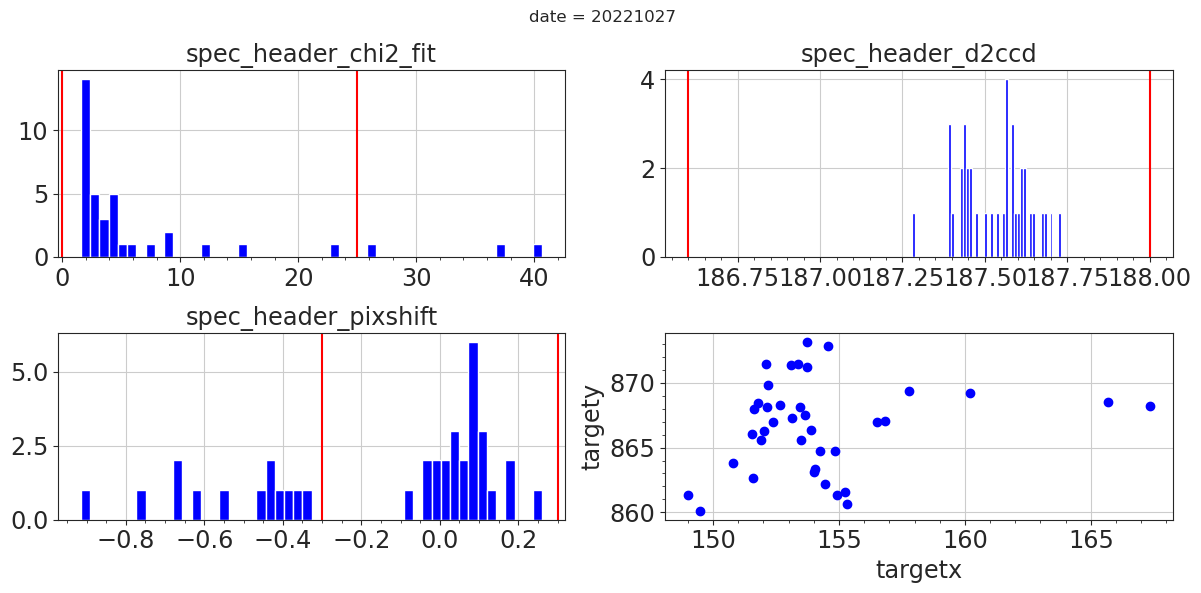

In [16]:
fig = plt.figure(figsize=(12,6))
axes = fig.subplots(2,2)
all_names = ['spec_header_chi2_fit','spec_header_d2ccd','spec_header_pixshift']
all_minval = [chi2_fit_min, d2ccd_min, pixshift_min ]
all_maxval = [chi2_fit_max, d2ccd_max, pixshift_max ]

for i, ax in enumerate(axes.flat):    
    if i <=2: 
        name = all_names[i]
        nbins=50
        values = df[name].values
        ax.hist(values,bins=nbins,facecolor="blue")
        ax.set_title(name)
        #ax.grid()
        ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
        ax.axvline(all_minval[i],color="r")
        ax.axvline(all_maxval[i],color="r")
        
    if i == 3:
        xval=df["spec_header_targetx"].values
        yval=df["spec_header_targety"].values
        ax.scatter(xval,yval,color="blue")
        ax.set_xlabel("targetx")
        ax.set_ylabel("targety")
        ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
        ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
        #ax.grid()
plt.suptitle(f"date = {DATE}")
plt.tight_layout()
plt.show()    

In [17]:
df_cut1 = df[['spec_header_chi2_fit','spec_header_d2ccd','spec_header_pixshift']]
df_cut2 = df[['spec_header_targetx','spec_header_targety']]

<Figure size 1400x1400 with 0 Axes>

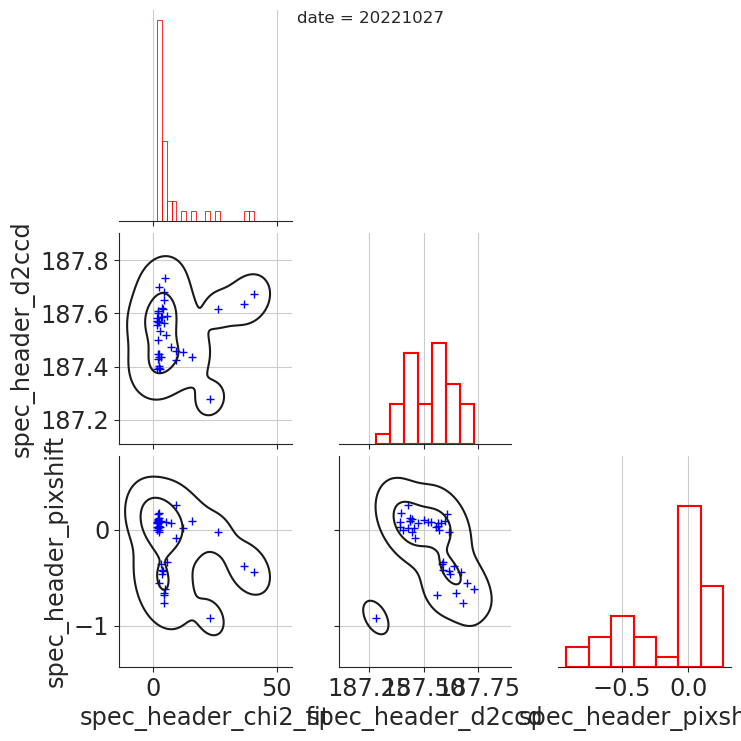

In [18]:
plt.figure(figsize=(14,14))
title = f"date = {DATE}"
g=sns.pairplot(df_cut1,corner=True,plot_kws=dict(marker="+", linewidth=1,color="b"),
             diag_kws=dict(color="r",fill=False),)
g.map_lower(sns.kdeplot, levels=3, color=".1")
plt.suptitle(title)
plt.show()

<Figure size 1600x1600 with 0 Axes>

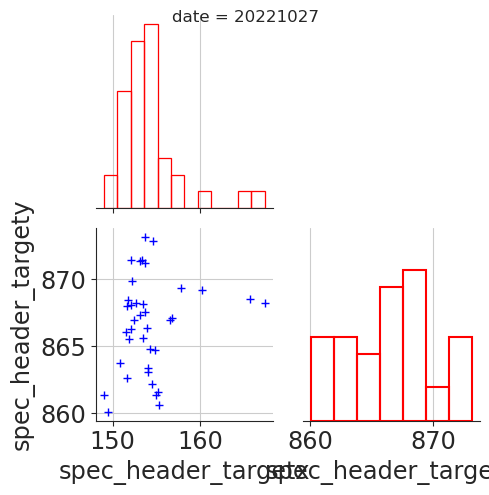

In [19]:
plt.figure(figsize=(16,16))
sns.pairplot(df_cut2,corner=True,plot_kws=dict(marker="+", linewidth=1,color="b"),
             diag_kws=dict(color="r",fill=False),)
plt.tight_layout()
plt.suptitle(title)
plt.show()

<AxesSubplot: title={'center': 'date = 20221027 , d2ccd_median = 187.56 '}, xlabel='exposure'>

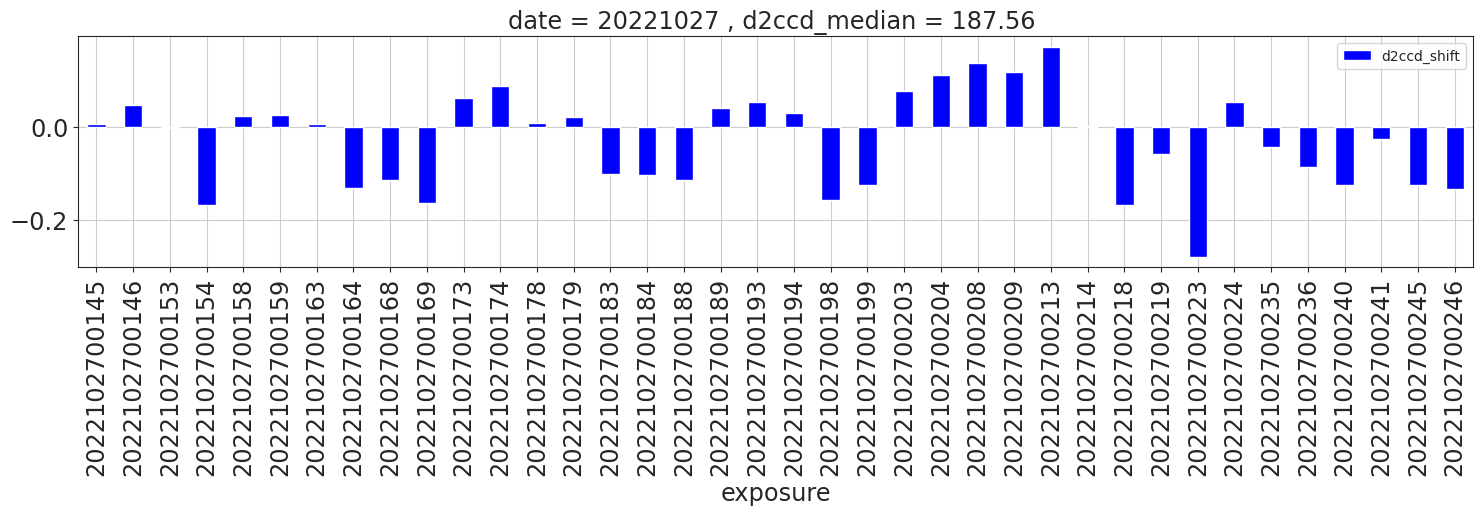

In [20]:
df.plot.bar(x="exposure", y="d2ccd_shift",color="blue",title=f"date = {DATE} , d2ccd_median = {d2ccd_median:.2f} ",figsize=(18,3))

<AxesSubplot: title={'center': 'date = 20221027, chi2_median = 3.13 '}, xlabel='exposure'>

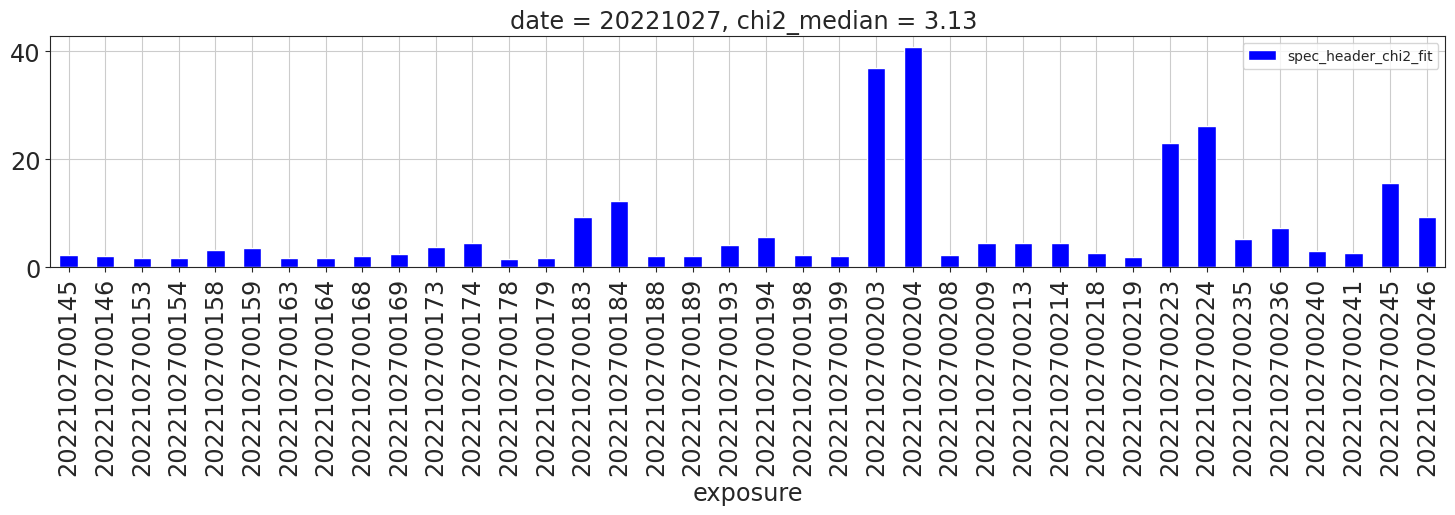

In [21]:
chi2_median = df["spec_header_chi2_fit"].median()
df.plot.bar(x="exposure", y="spec_header_chi2_fit",color="blue",title=f"date = {DATE}, chi2_median = {chi2_median:.2f} ",figsize=(18,3))

<AxesSubplot: title={'center': 'date = 20221027, pixshift_median = 0.018'}, xlabel='exposure'>

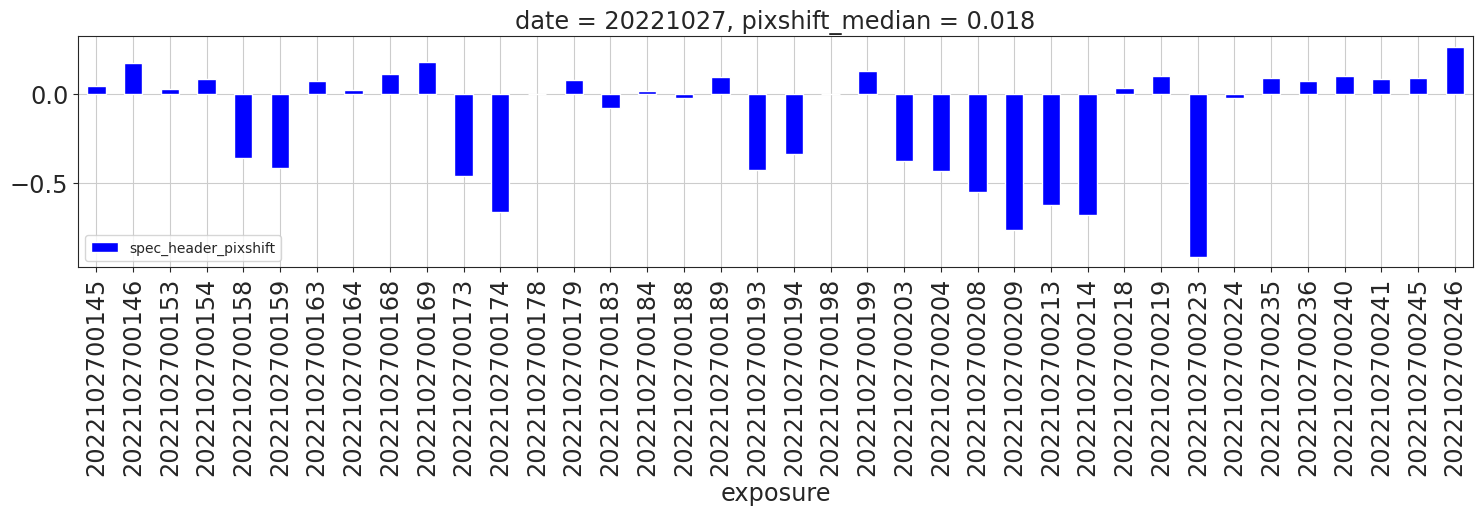

In [22]:
pixshift_median = df["spec_header_pixshift"].median()
df.plot.bar(x="exposure", y="spec_header_pixshift",color="blue", title=f"date = {DATE}, pixshift_median = {pixshift_median:.3f}",figsize=(18,3))

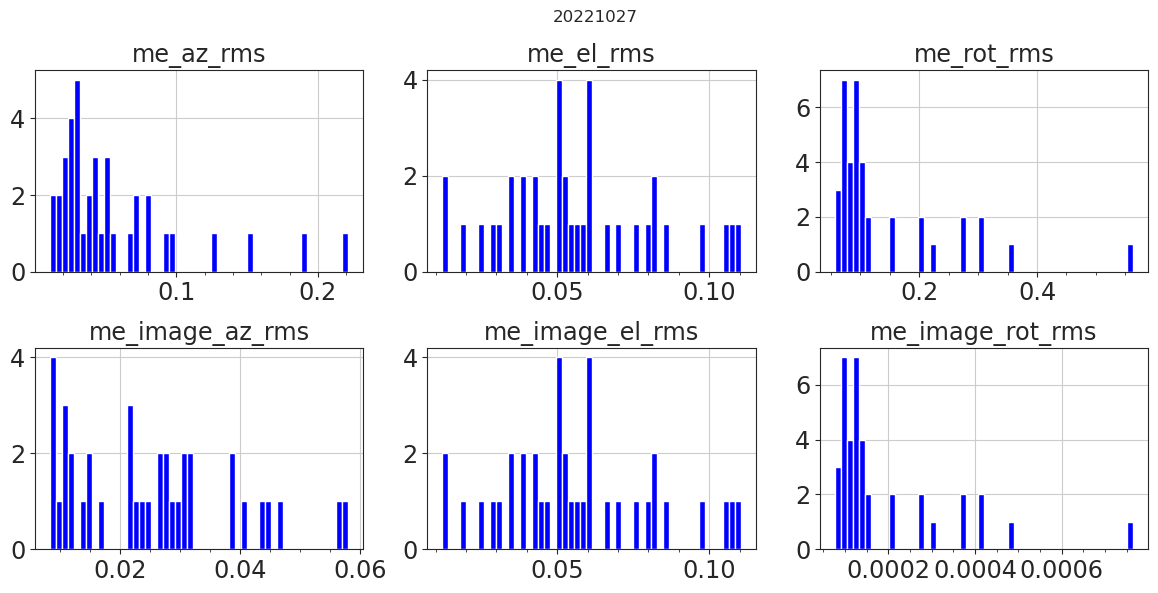

In [23]:
fig = plt.figure(figsize=(12,6))
axes = fig.subplots(2,3)
all_names = ["me_az_rms","me_el_rms","me_rot_rms","me_image_az_rms","me_image_el_rms","me_image_rot_rms"]

for i, ax in enumerate(axes.flat):    
    name = all_names[i]
    nbins=50
    values =  df[name].values
    ax.hist(values,bins=nbins,facecolor="blue")
    ax.set_title(name)
    #ax.grid()
    ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
    
plt.suptitle(DATE)
plt.tight_layout()
plt.show()    

In [24]:
df_cut3 =df[all_names]

<Figure size 1400x1400 with 0 Axes>

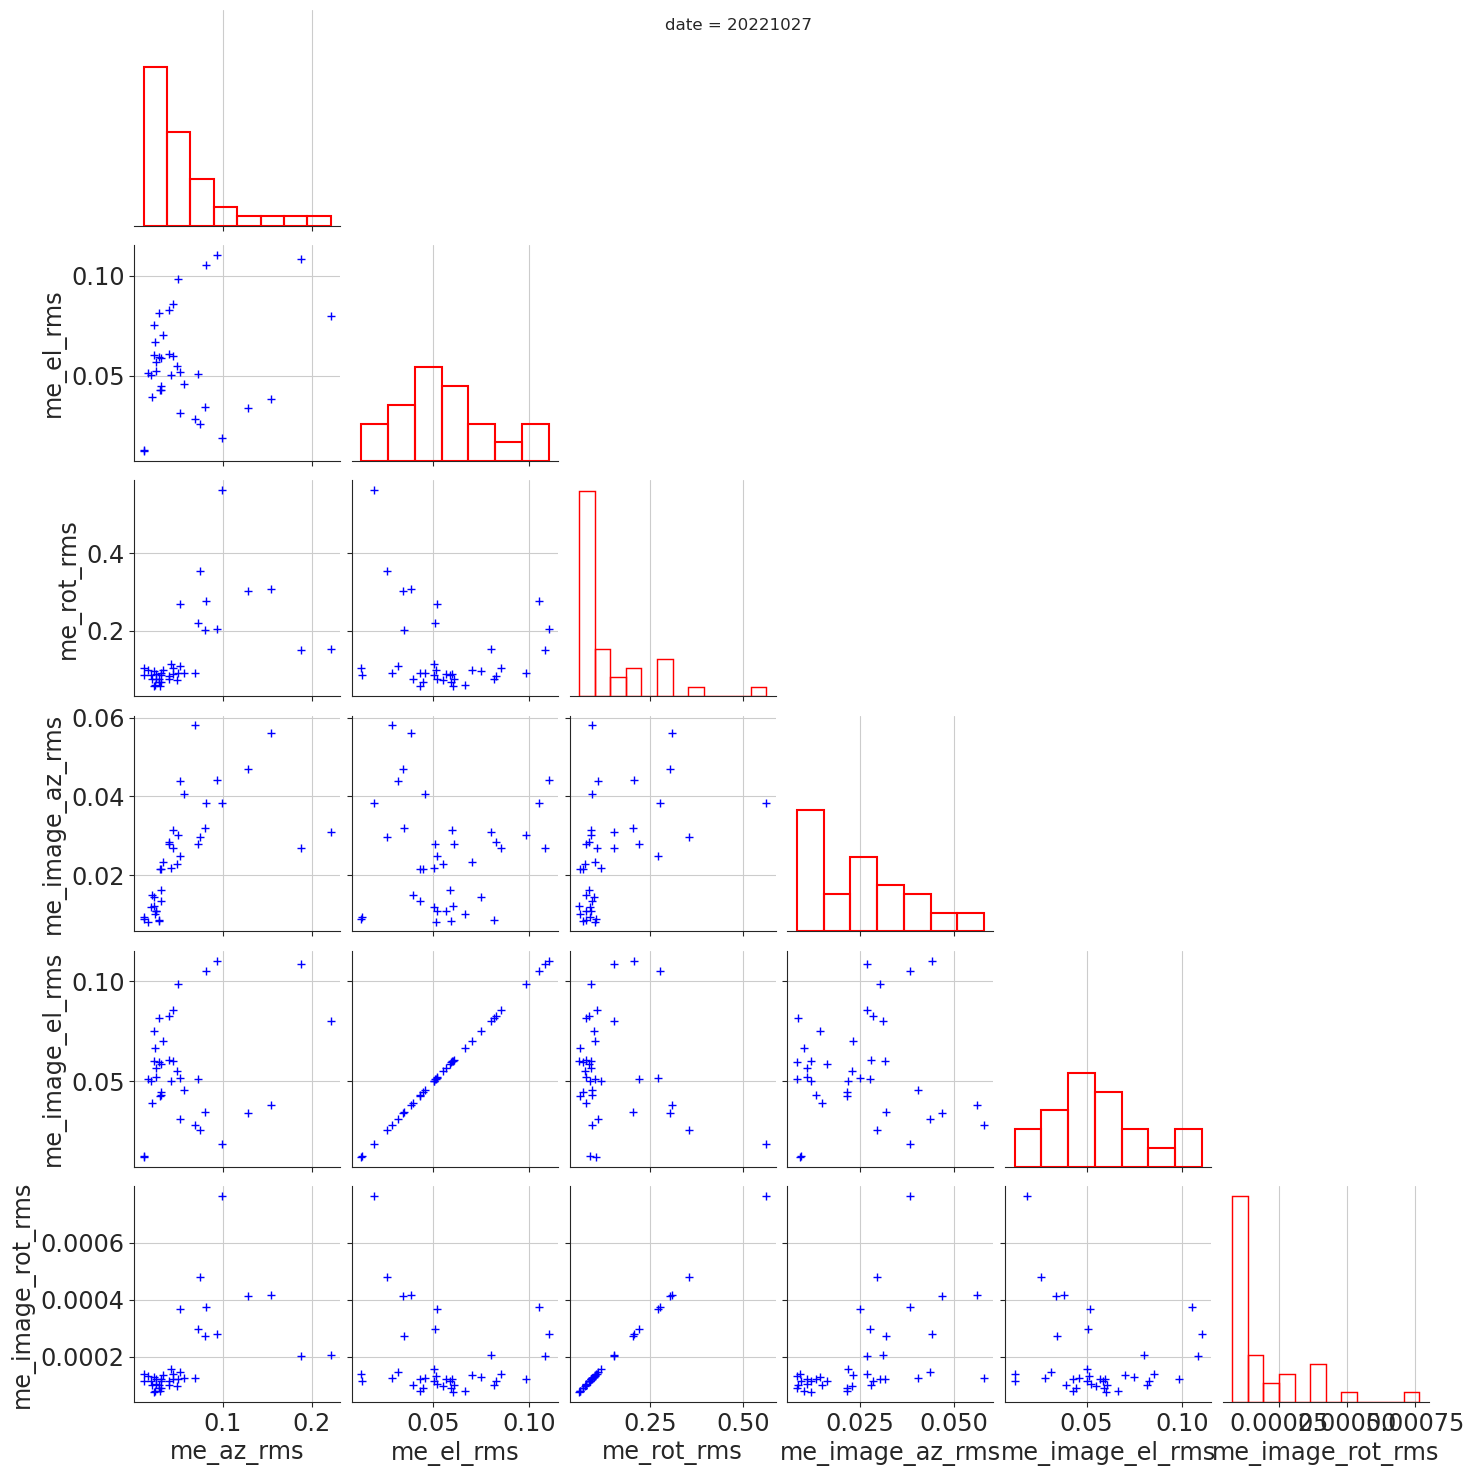

In [25]:
plt.figure(figsize=(14,14))
sns.pairplot(df_cut3,corner=True,plot_kws=dict(marker="+", linewidth=1,color="b"),
             diag_kws=dict(color="r",fill=False),)
plt.suptitle(f"date = {DATE}")
plt.show()

# Selection of Bads and goods

In [26]:
df[~(cut1 & cut2 & cut3)]

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,spec_parallactic_angle,spec_camera_angle,spec_order,spec_header_target,spec_header_redshift,spec_header_grating,spec_header_rotangle,spec_header_d2ccd,spec_header_lshift,spec_header_parangle,spec_header_targetx,spec_header_targety,spec_header_lbda_ref,spec_header_pixshift,spec_header_psf_reg,spec_header_trace_r,spec_header_chi2_fit,spec_header_a2_fit,spec_header_am_fit,spec_header_meanfwhm,spec_header_version,spec_header_rebin,spec_header_date-obs,spec_header_exptime,spec_header_airmass,spec_header_dec,spec_header_ha,spec_header_outtemp,spec_header_outpress,spec_header_outhum,spec_header_filter,spec_header_cam_rot,spec_header_s_x0,spec_header_s_y0,spec_header_s_xmin,spec_header_s_xmax,spec_header_s_ymin,spec_header_s_ymax,spec_header_s_nx,spec_header_s_ny,spec_header_s_dec,spec_header_s_sat,spec_spectrogram_x0,spec_spectrogram_y0,spec_spectrogram_xmin,spec_spectrogram_xmax,spec_spectrogram_ymin,spec_spectrogram_ymax,spec_spectrogram_deg,spec_spectrogram_saturation,spec_spectrogram_Nx,spec_spectrogram_Ny,me_az_rms,me_el_rms,me_rot_rms,me_image_az_rms,me_image_el_rms,me_image_rot_rms,d2ccd_shift
4,4,2022102700158,2022-10-28T00:15:17.444504030Z,HD2811,empty,1.196230,0,0,0,-38.737603,-79.582548,259.772042,1,HD2811,0.000000,holo4_003,0.262299,187.584631,0.0,-79.582548,153.128429,867.296563,536.555932,-0.360554,0.020406,365.187870,3.181567,1.0,1.196230,5.395278,2.4,2,2022-10-28T00:15:17.444504030Z,30.0,1.196230,-43.562156,-38.737603,0,0,0,empty,259.772042,-418.228712,88.296563,573,1710,779,964,1137,185,2,22666.666667,-418.228712,88.296563,573,1710,779,964,2,22666.666667,1137,185,0.022251,0.060141,0.056679,0.012223,0.060141,0.000077,0.024546
5,5,2022102700159,2022-10-28T00:16:00.415498522Z,HD2811,empty,1.194479,0,0,0,-38.558140,-79.422751,259.771304,1,HD2811,0.000000,holo4_003,0.260348,187.586427,0.0,-79.422751,152.401425,866.973540,536.555932,-0.416409,0.059962,294.245462,3.571232,1.0,1.194479,5.829033,2.4,2,2022-10-28T00:16:00.415498522Z,30.0,1.194479,-43.562172,-38.558140,0,0,0,empty,259.771304,-418.568214,87.973540,573,1709,779,964,1136,185,2,22666.666667,-418.568214,87.973540,573,1709,779,964,2,22666.666667,1136,185,0.029959,0.058600,0.084593,0.016401,0.058600,0.000115,0.026343
10,10,2022102700173,2022-10-28T00:24:13.606508486Z,HD2811,empty,1.175254,0,0,0,-36.499619,-77.536014,257.647808,1,HD2811,0.000000,holo4_003,0.267281,187.621913,0.0,-77.536014,151.887425,865.564960,536.555932,-0.459848,0.028621,329.123395,3.759100,1.0,1.175254,5.497341,2.4,2,2022-10-28T00:24:13.606508486Z,30.0,1.175254,-43.562236,-36.499619,0,0,0,empty,257.647808,-419.414611,88.564960,573,1709,777,962,1136,185,2,22666.666667,-419.414611,88.564960,573,1709,777,962,2,22666.666667,1136,185,0.041443,0.050249,0.115225,0.021794,0.050249,0.000156,0.061828
11,11,2022102700174,2022-10-28T00:24:56.521508893Z,HD2811,empty,1.173654,0,0,0,-36.320293,-77.366704,257.647965,1,HD2811,0.000000,holo4_003,0.271858,187.648866,0.0,-77.366704,152.043916,866.257447,536.555932,-0.660308,0.045303,307.155041,4.498158,1.0,1.173654,5.455053,2.4,2,2022-10-28T00:24:56.521508893Z,30.0,1.173654,-43.562234,-36.320293,0,0,0,empty,257.647965,-418.362708,88.257447,572,1709,778,963,1137,185,2,22666.666667,-418.362708,88.257447,572,1709,778,963,2,22666.666667,1137,185,0.015904,0.051132,0.098769,0.008333,0.051132,0.000134,0.088781
18,18,2022102700193,2022-10-28T00:40:46.835505839Z,HD2811,empty,1.140931,0,0,0,-32.353137,-73.383657,253.648442,1,HD2811,0.000000,holo4_003,0.255731,187.614887,0.0,-73.383657,153.658658,867.525323,536.555932,-0.425469,0.085963,276.833680,4.169769,1.0,1.140931,5.567682,2.4,2,2022-10-28T00:40:46.835505839Z,30.0,1.140931,-43.564052,-32.353137,0,0,0,empty,253.648442,-417.830753,88.525323,573,1710,779,964,1137,185,2,22666.666667,-417.830753,88.525323,573,1710,779,964,2,22666.666667,1137,185,0.051860,0.051688,0.269833,0.024993,0.051688,0

In [27]:
df[(cut1 & cut2 & cut3)]

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,spec_parallactic_angle,spec_camera_angle,spec_order,spec_header_target,spec_header_redshift,spec_header_grating,spec_header_rotangle,spec_header_d2ccd,spec_header_lshift,spec_header_parangle,spec_header_targetx,spec_header_targety,spec_header_lbda_ref,spec_header_pixshift,spec_header_psf_reg,spec_header_trace_r,spec_header_chi2_fit,spec_header_a2_fit,spec_header_am_fit,spec_header_meanfwhm,spec_header_version,spec_header_rebin,spec_header_date-obs,spec_header_exptime,spec_header_airmass,spec_header_dec,spec_header_ha,spec_header_outtemp,spec_header_outpress,spec_header_outhum,spec_header_filter,spec_header_cam_rot,spec_header_s_x0,spec_header_s_y0,spec_header_s_xmin,spec_header_s_xmax,spec_header_s_ymin,spec_header_s_ymax,spec_header_s_nx,spec_header_s_ny,spec_header_s_dec,spec_header_s_sat,spec_spectrogram_x0,spec_spectrogram_y0,spec_spectrogram_xmin,spec_spectrogram_xmax,spec_spectrogram_ymin,spec_spectrogram_ymax,spec_spectrogram_deg,spec_spectrogram_saturation,spec_spectrogram_Nx,spec_spectrogram_Ny,me_az_rms,me_el_rms,me_rot_rms,me_image_az_rms,me_image_el_rms,me_image_rot_rms,d2ccd_shift
0,0,2022102700145,2022-10-28T00:04:13.430999860Z,HD185975,empty,1.842796,0,0,0,-341.621948,18.867413,160.783416,1,HD185975,-0.000065,holo4_003,0.452874,187.566416,0.0,18.867413,160.214865,869.203413,597.257159,0.041192,0.208719,223.809745,2.339117,1.0,1.842796,7.917042,2.4,2,2022-10-28T00:04:13.430999860Z,30.0,1.842796,-87.493073,-341.621948,0,0,0,empty,160.783416,-416.984949,84.203413,577,1714,785,970,1137,185,2,22666.666667,-416.984949,84.203413,577,1714,785,970,2,22666.666667,1137,185,0.011372,0.012572,0.085639,0.009561,0.012572,0.000116,0.006331
1,1,2022102700146,2022-10-28T00:04:56.343991525Z,HD185975,empty,1.842911,0,0,0,-341.442149,19.051787,160.782913,1,HD185975,-0.000065,holo4_003,0.431847,187.607997,0.0,19.051787,157.781817,869.343291,597.257159,0.169292,0.200967,231.798728,2.104144,1.0,1.842911,7.238794,2.4,2,2022-10-28T00:04:56.343991525Z,30.0,1.842911,-87.493138,-341.442149,0,0,0,empty,160.782913,-418.539300,84.343291,576,1712,785,970,1136,185,2,22666.666667,-418.539300,84.343291,576,1712,785,970,2,22666.666667,1136,185,0.010775,0.012230,0.103625,0.009059,0.012230,0.000141,0.047912
2,2,2022102700153,2022-10-28T00:11:48.764009210Z,HD200654,empty,1.073826,0,0,0,-348.460024,28.033754,152.883635,1,HD200654,-0.000149,holo4_003,0.216580,187.557510,0.0,28.033754,153.374632,871.412451,596.126479,0.027531,0.831764,190.541377,1.743626,1.0,1.073826,6.462489,2.4,2,2022-10-28T00:11:48.764009210Z,30.0,1.073826,-49.996335,-348.460024,0,0,0,empty,152.883635,-417.956411,89.412451,571,1708,782,967,1137,185,2,22666.666667,-417.956411,89.412451,571,1708,782,967,2,22666.666667,1137,185,0.153752,0.038088,0.307957,0.056073,0.038088,0.000418,-0.002575
3,3,2022102700154,2022-10-28T00:12:31.724997308Z,HD200654,empty,1.074223,0,0,0,-348.280497,28.428026,152.883826,1,HD200654,-0.000149,holo4_003,0.208701,187.391934,0.0,28.428026,152.112466,871.450669,596.126479,0.080824,0.497952,185.195188,1.663483,1.0,1.074223,7.154198,2.4,2,2022-10-28T00:12:31.724997308Z,30.0,1.074223,-49.996363,-348.280497,0,0,0,empty,152.883826,-418.904629,89.450669,571,1707,782,967,1136,185,2,22666.666667,-418.904629,89.450669,571,1707,782,967,2,22666.666667,1136,185,0.128335,0.033862,0.303687,0.046916,0.033862,0.000412,-0.168150
6,6,2022102700163,2022-10-28T00:18:22.833492481Z,HD009051,empty,1.451308,0,0,0,-52.297835,-109.477346,-70.536698,1,HD009051,-0.000239,holo4_003,0.344510,187.566245,0.0,-109.477346,154.935884,861.353646,619.251831,0.070655,0.217771,268.287617,1.795038,1.0,1.451308,5.479103,2.4,2,2022-10-28T00:18:22.833492481Z,30.0,1.451308,-24.293474,-52.297835,0,0,0,empty,-70.536698,-418.347916,86.353646,573,1709,775,960,1136,185,2,22666.666667,-418.347916,86.353646,573,1709,775,960,2,22666.666667,1136,185,0.055845,0.045811,0.091886,0